<a href="https://colab.research.google.com/github/jinesh90/120-Data-Science-Interview-Questions/blob/master/PHYS247_Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to applied data science PHYS247 Homework1**

Problem 1: Linear algebra 

**Part a) Show that the above equation can be written in a form of matrix such that Ω(S,N) is Sth element of a 10 x 1 matrix (ΩN)**

In [2]:
# Upload answer file  for 1(a)
# from google.colab import files
# from IPython import display

# uploaded = files.upload()

Saving a-1.jpg to a-1.jpg


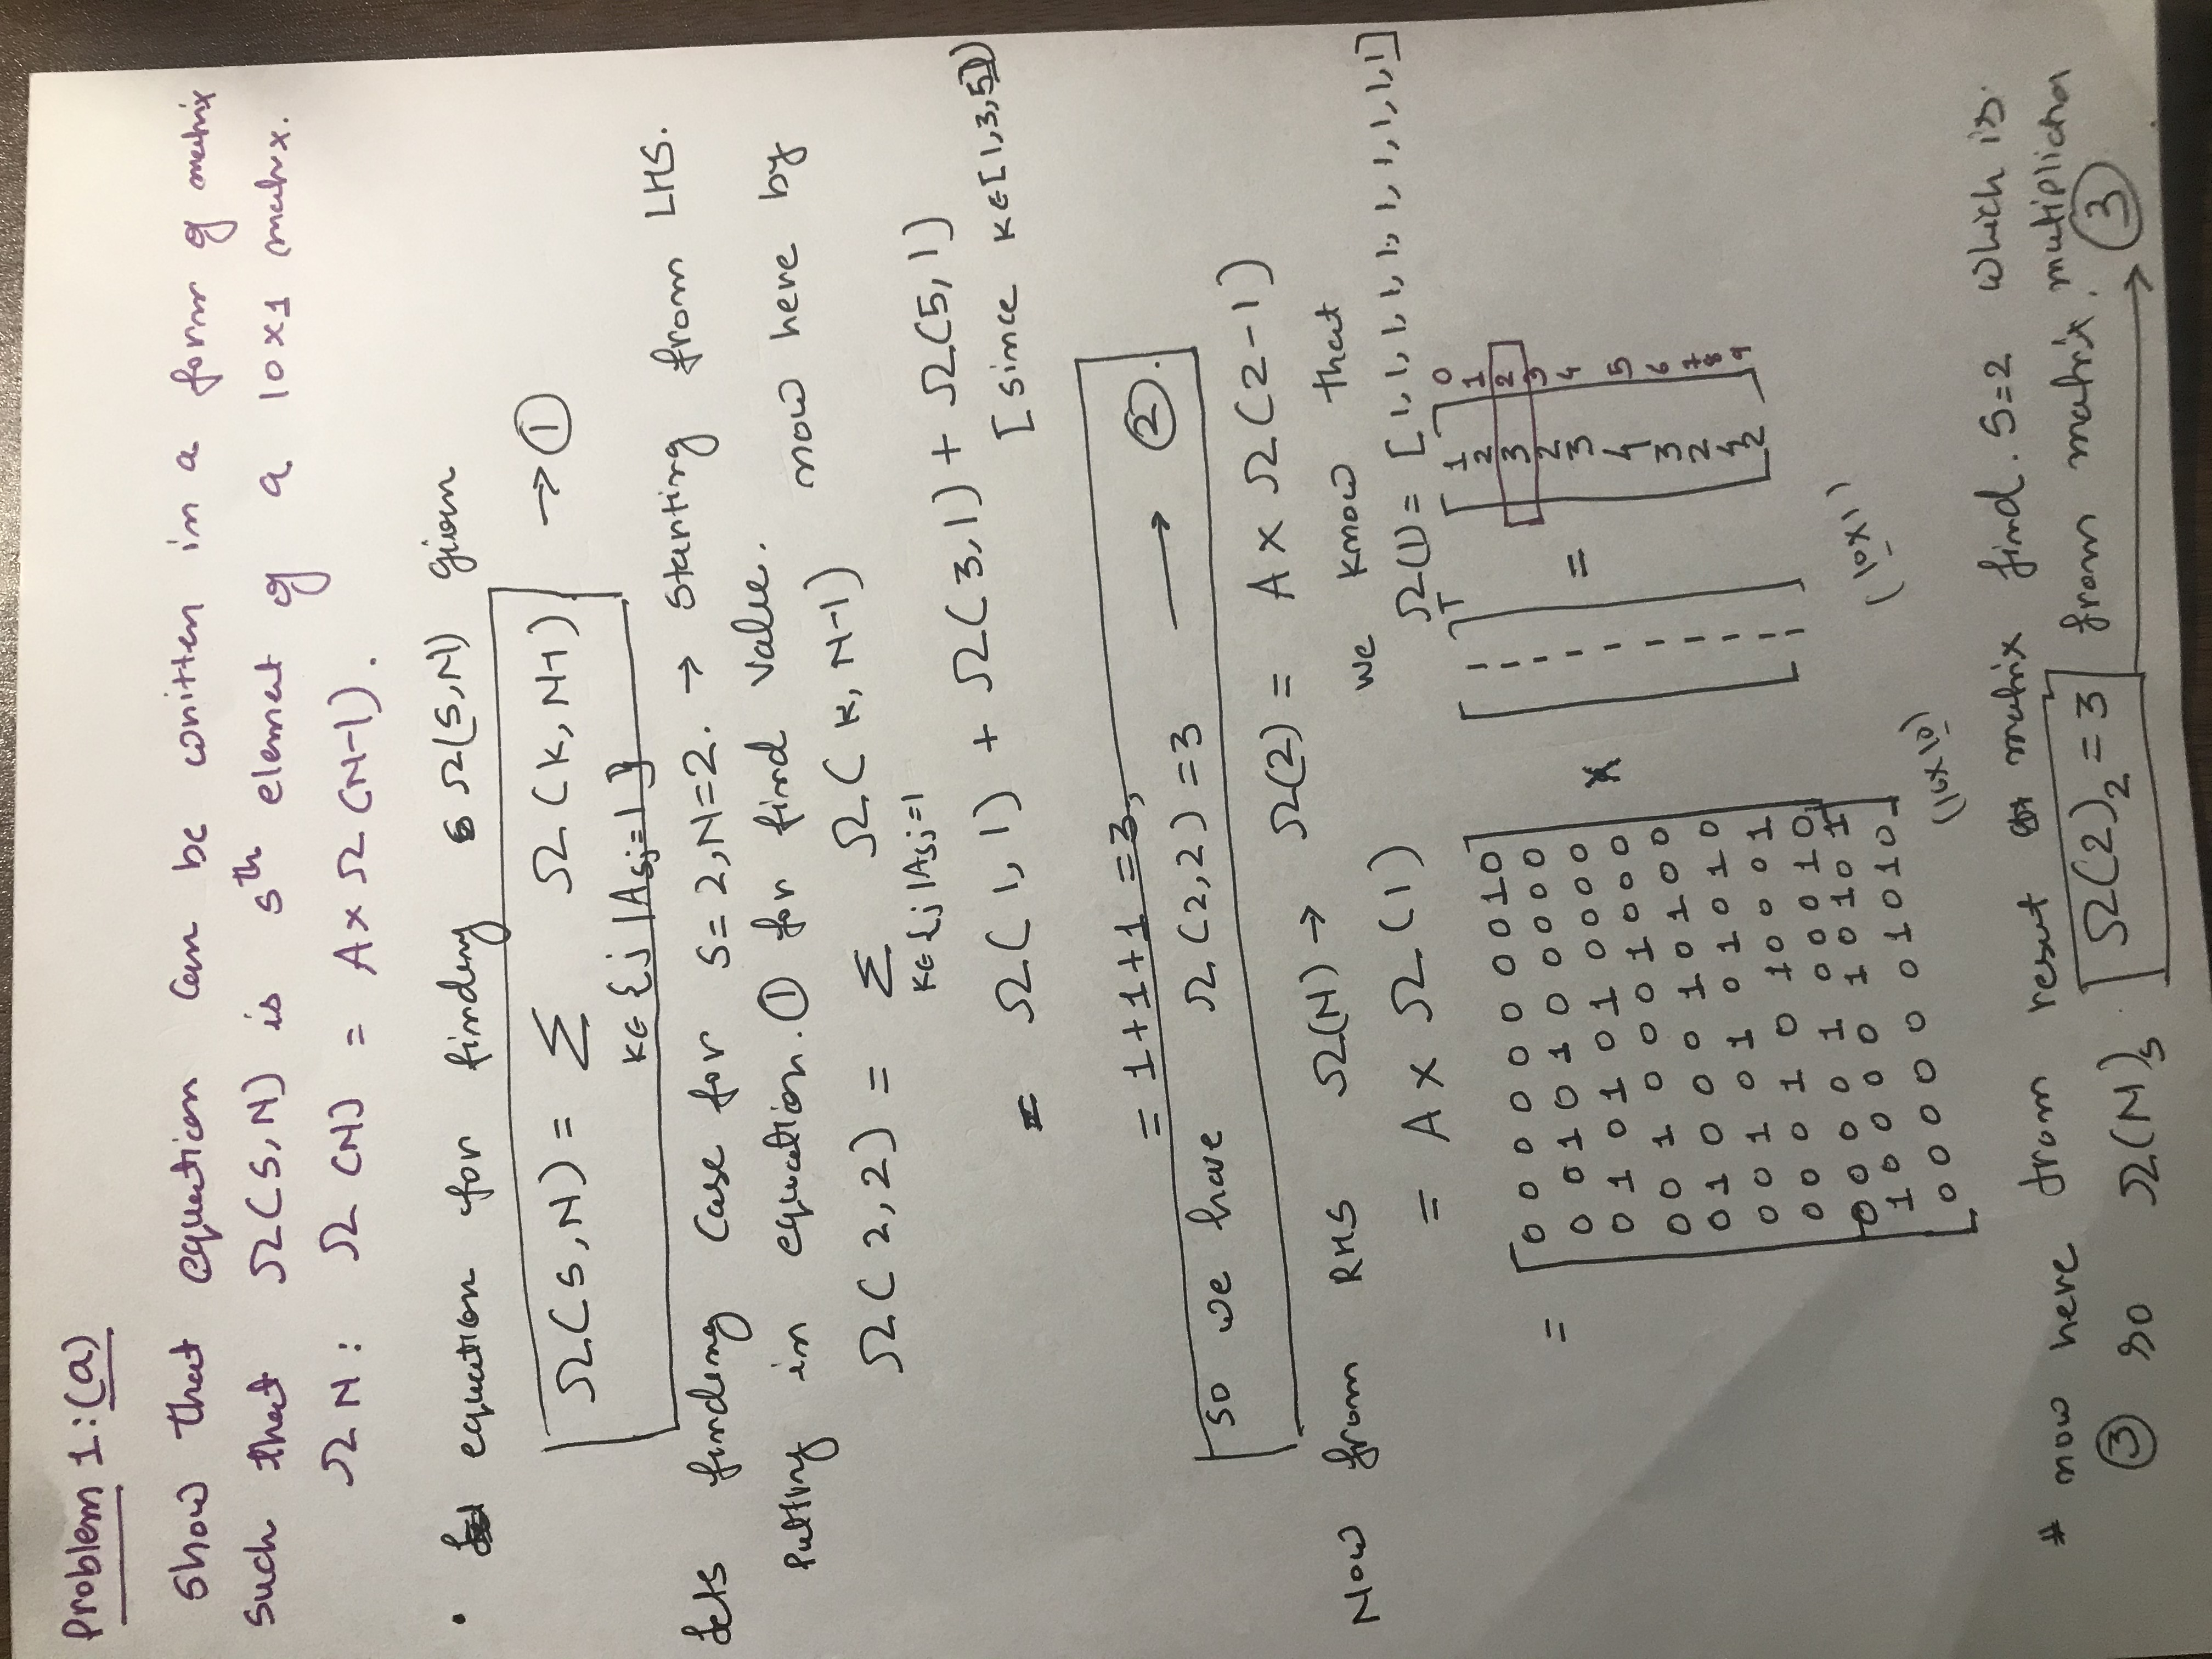

In [8]:
display.Image('a-1.jpg',width=500)

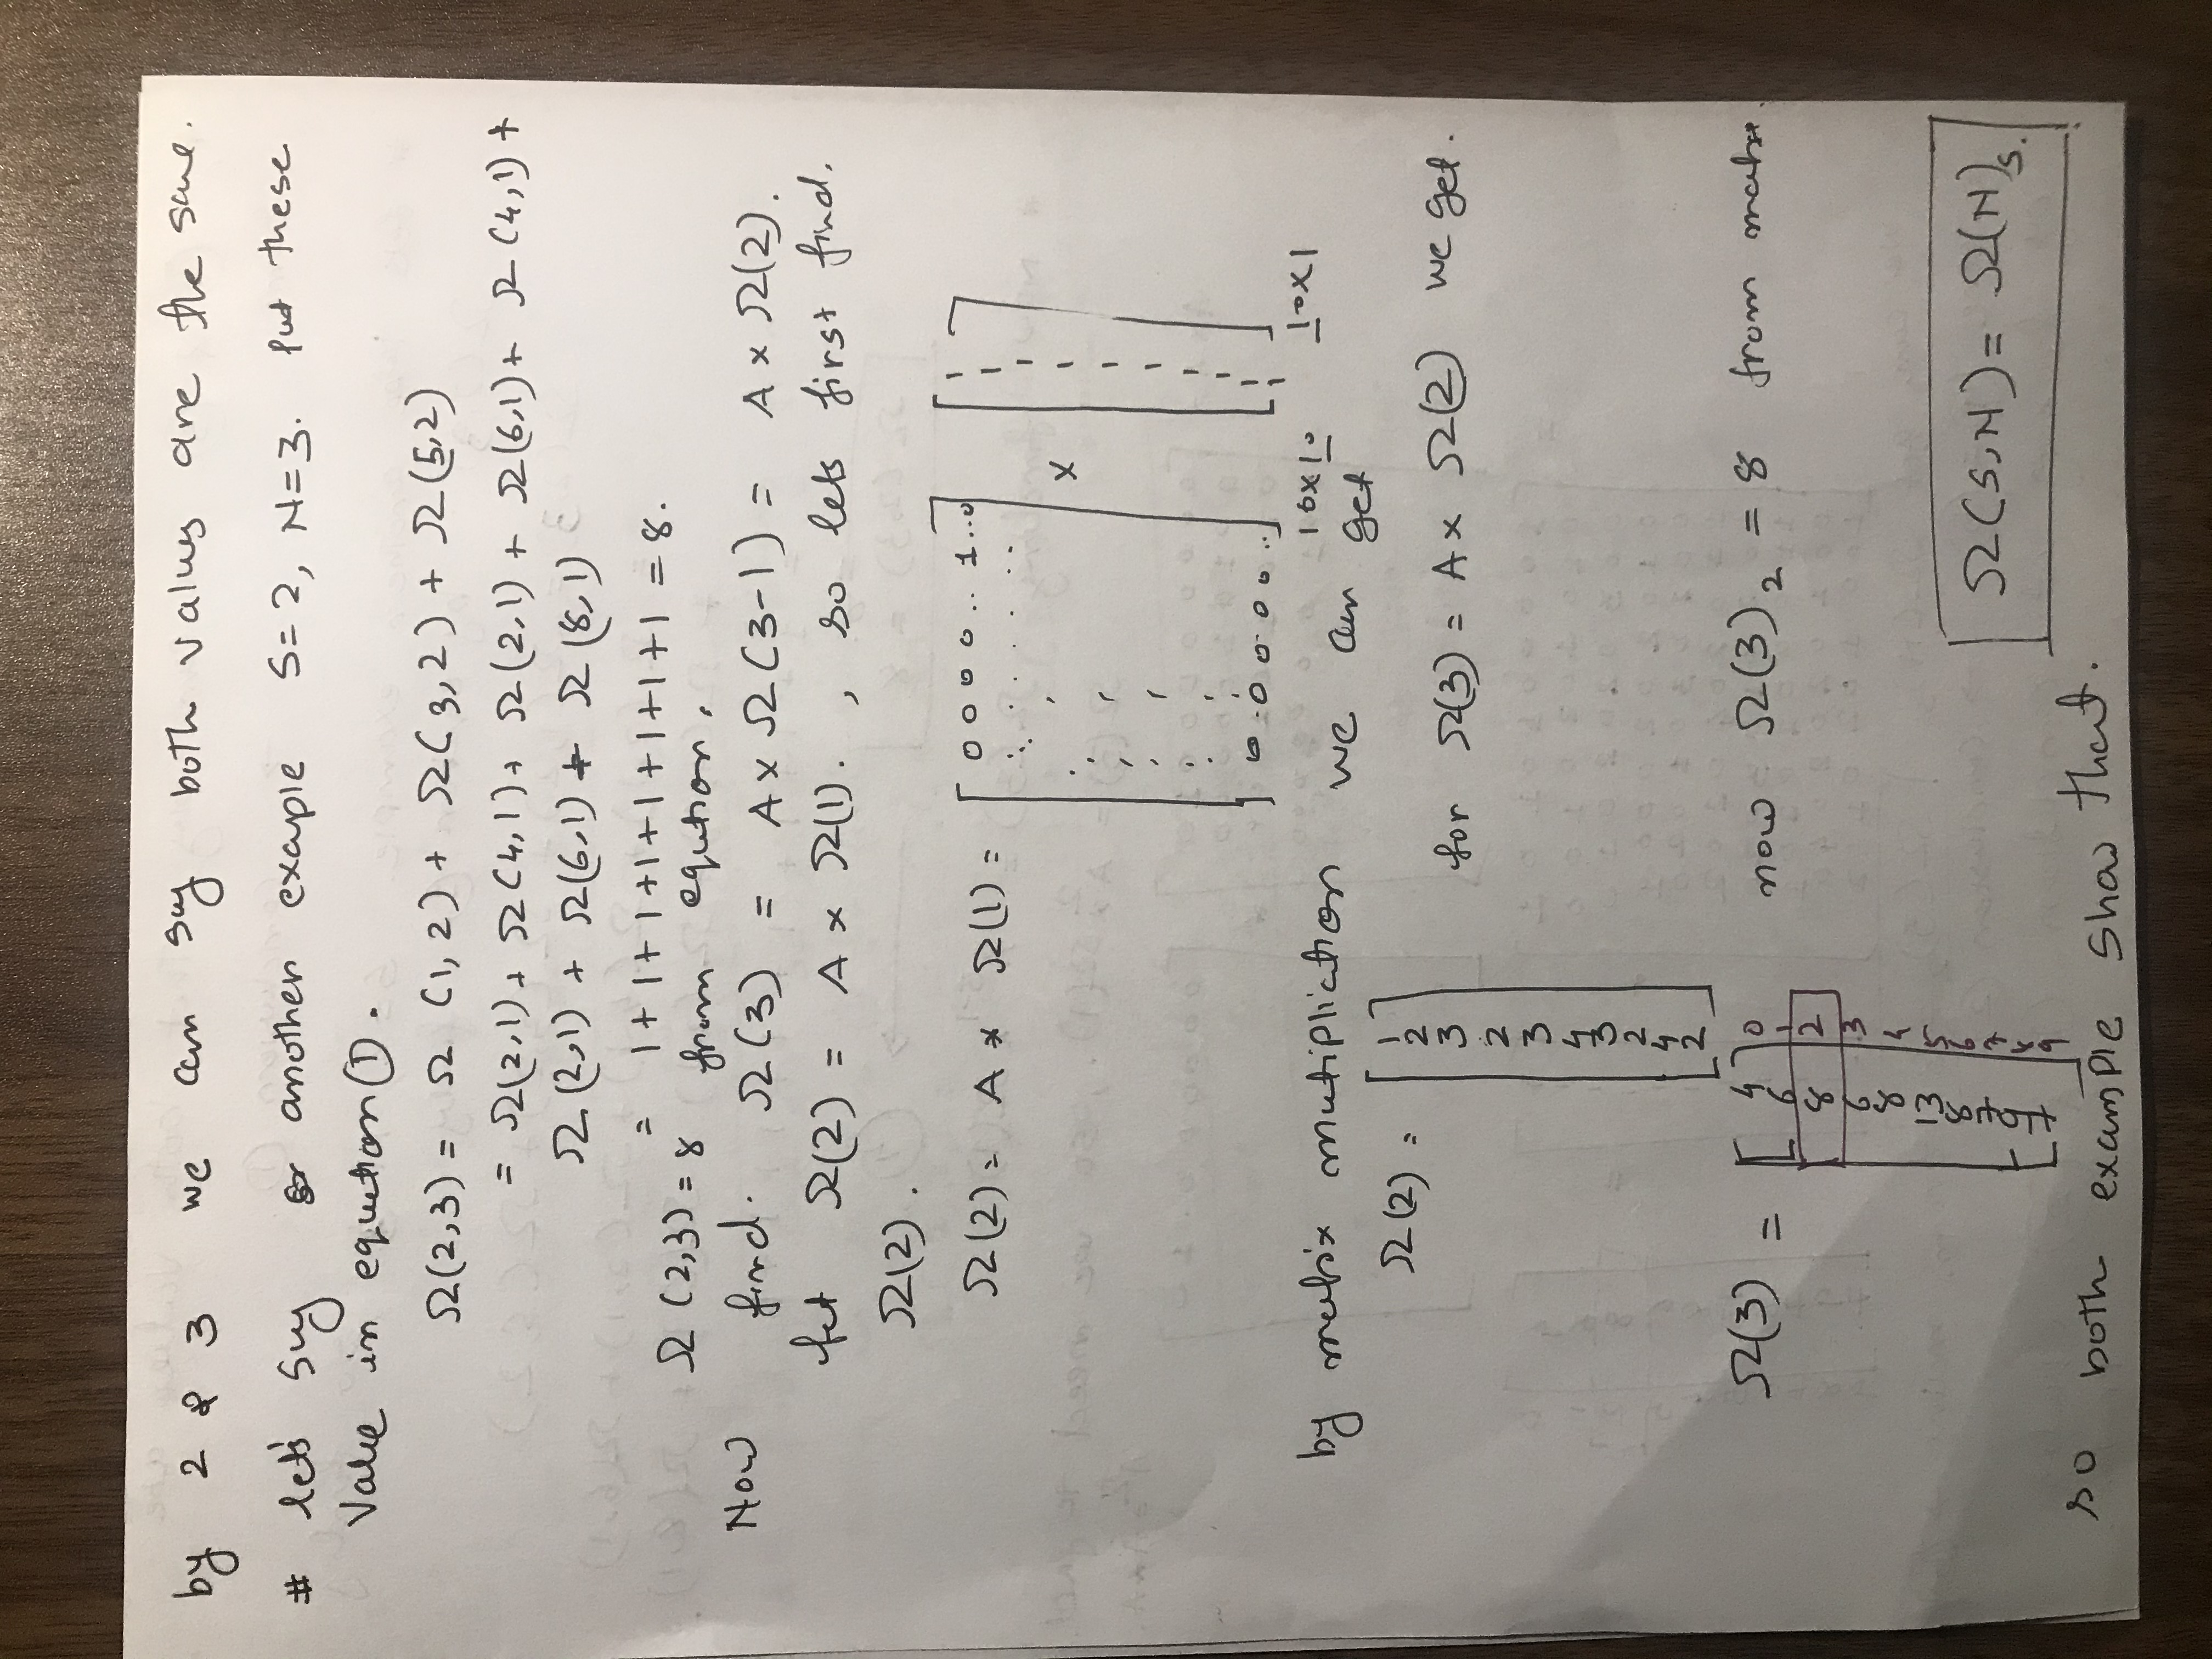

In [10]:
display.Image('a-2.jpg',width=500)

**Part b) Show that Ω(N) can be found recursively suing the followong equation:Ω(N) = A x A x A ... x A x Ω(1) = A^N-1 x Ω(1)**

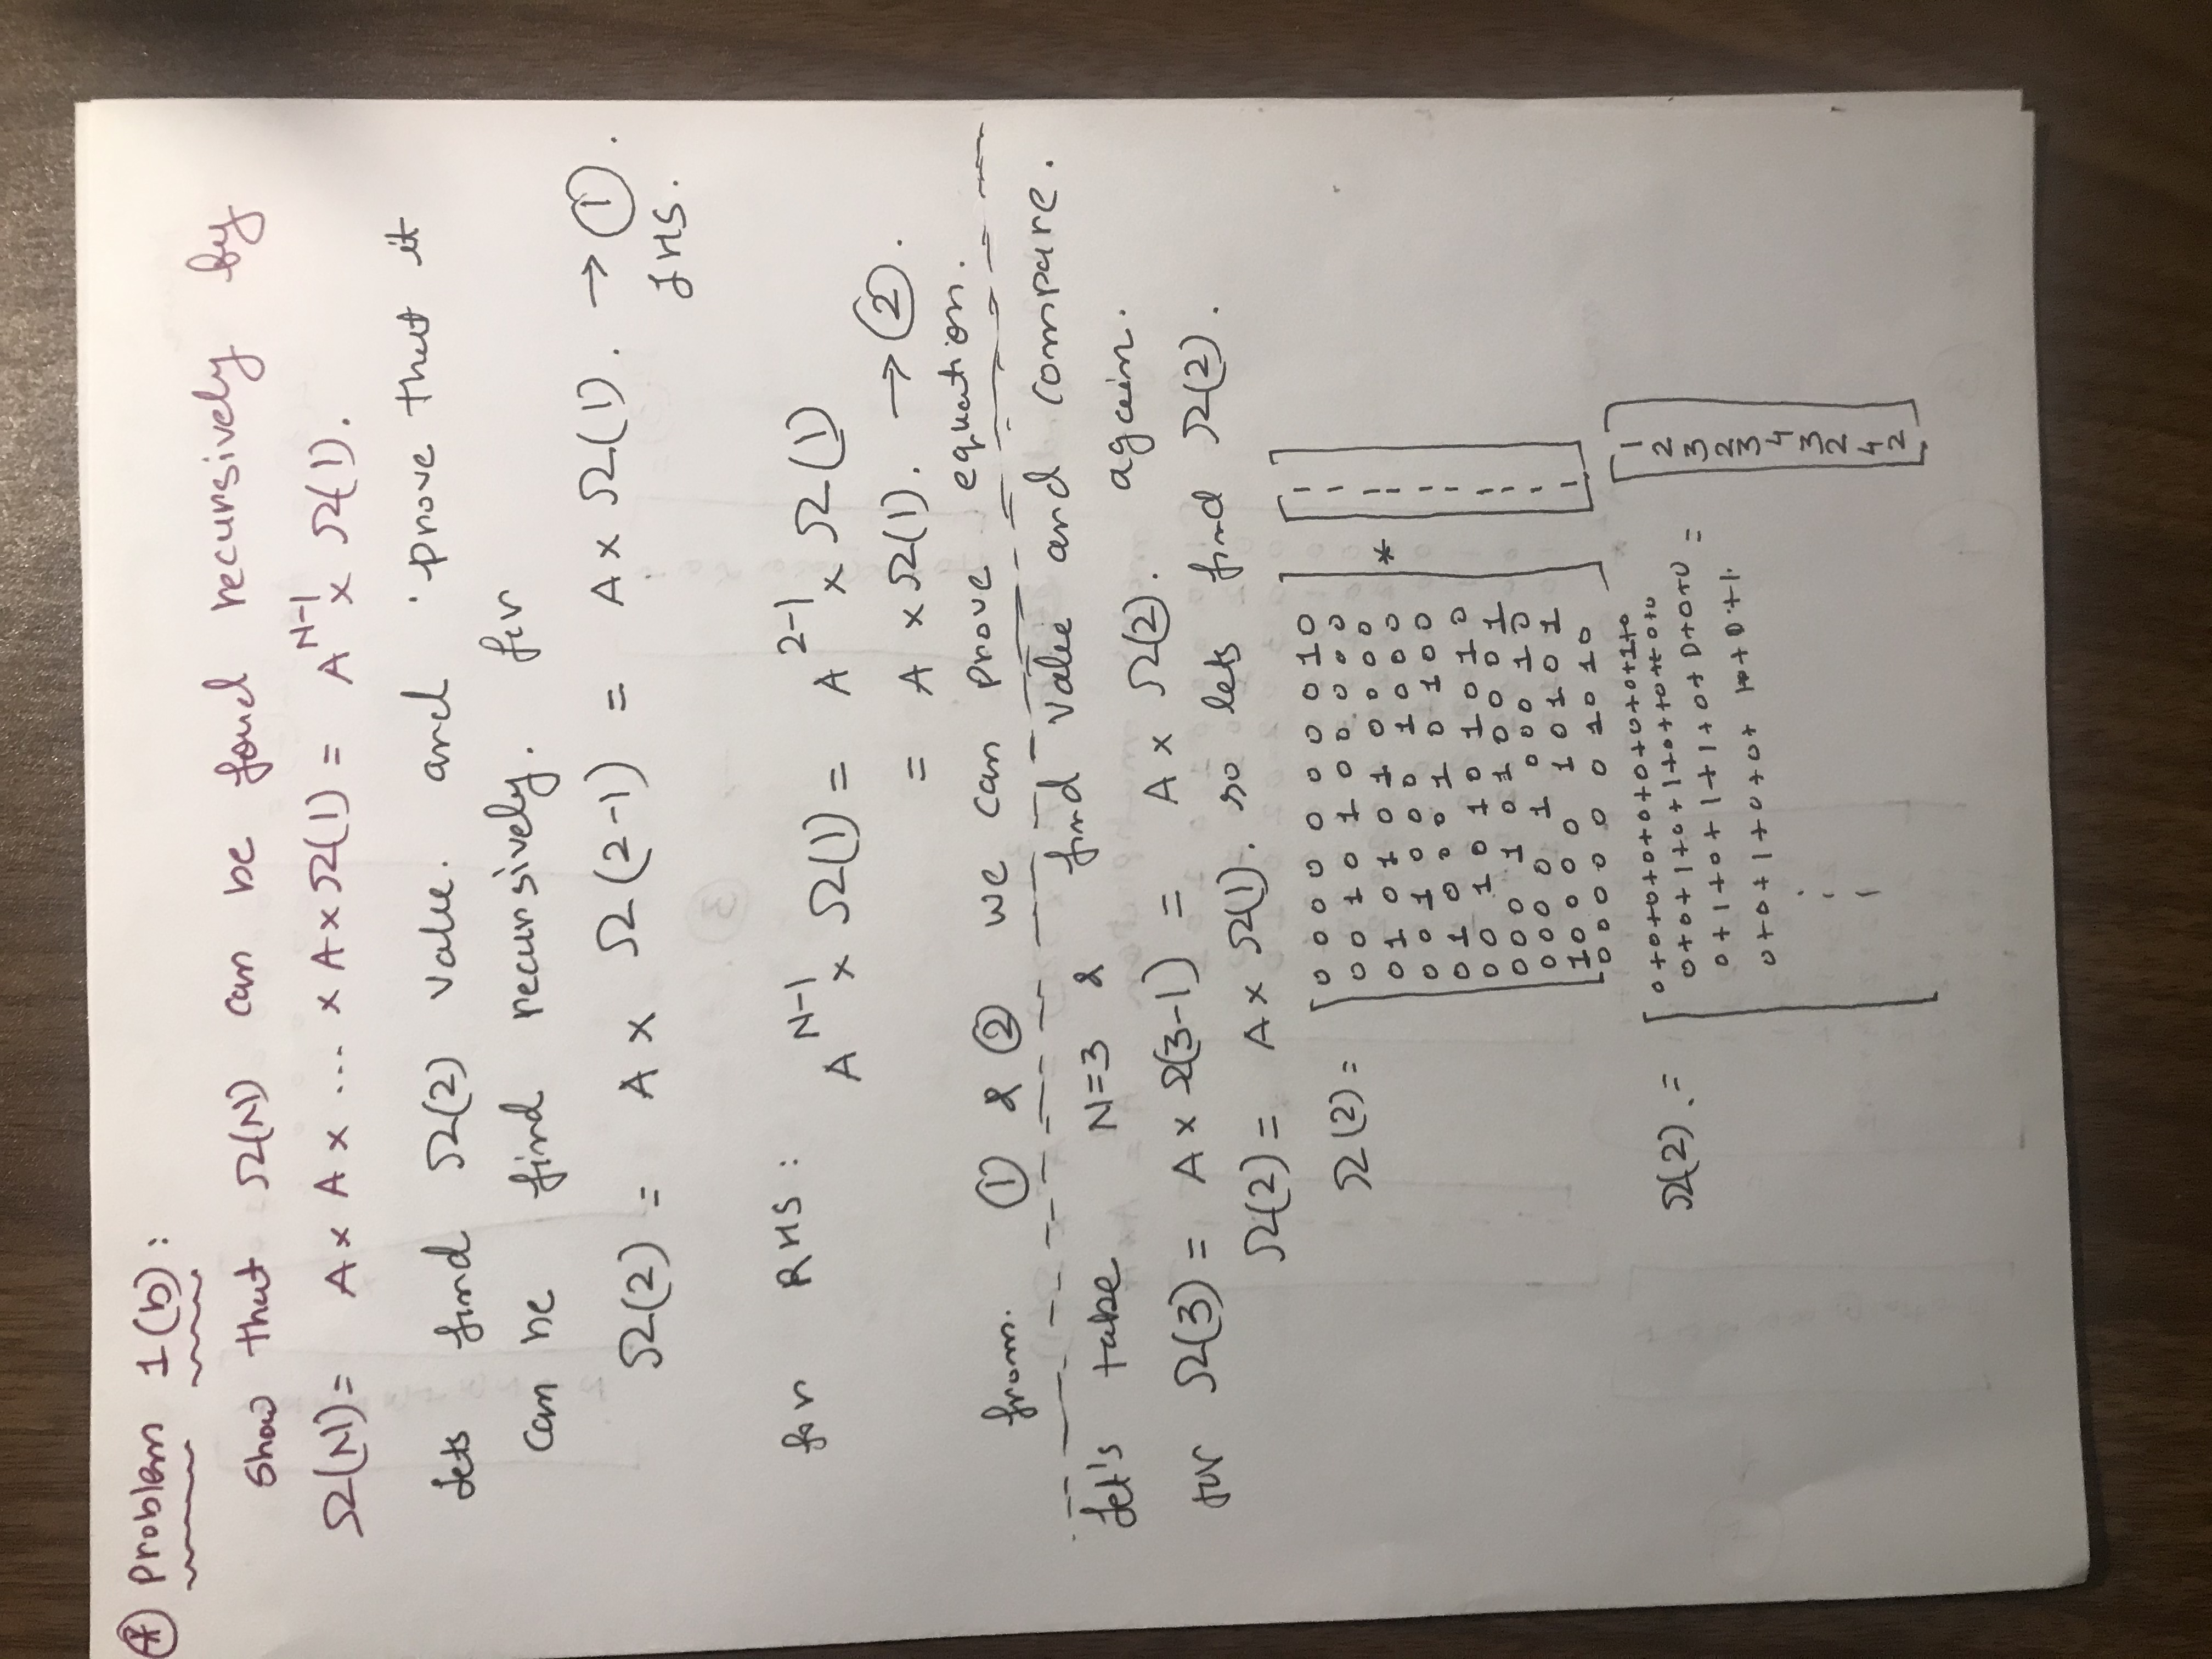

In [12]:
display.Image('b-1.jpg',width=500)

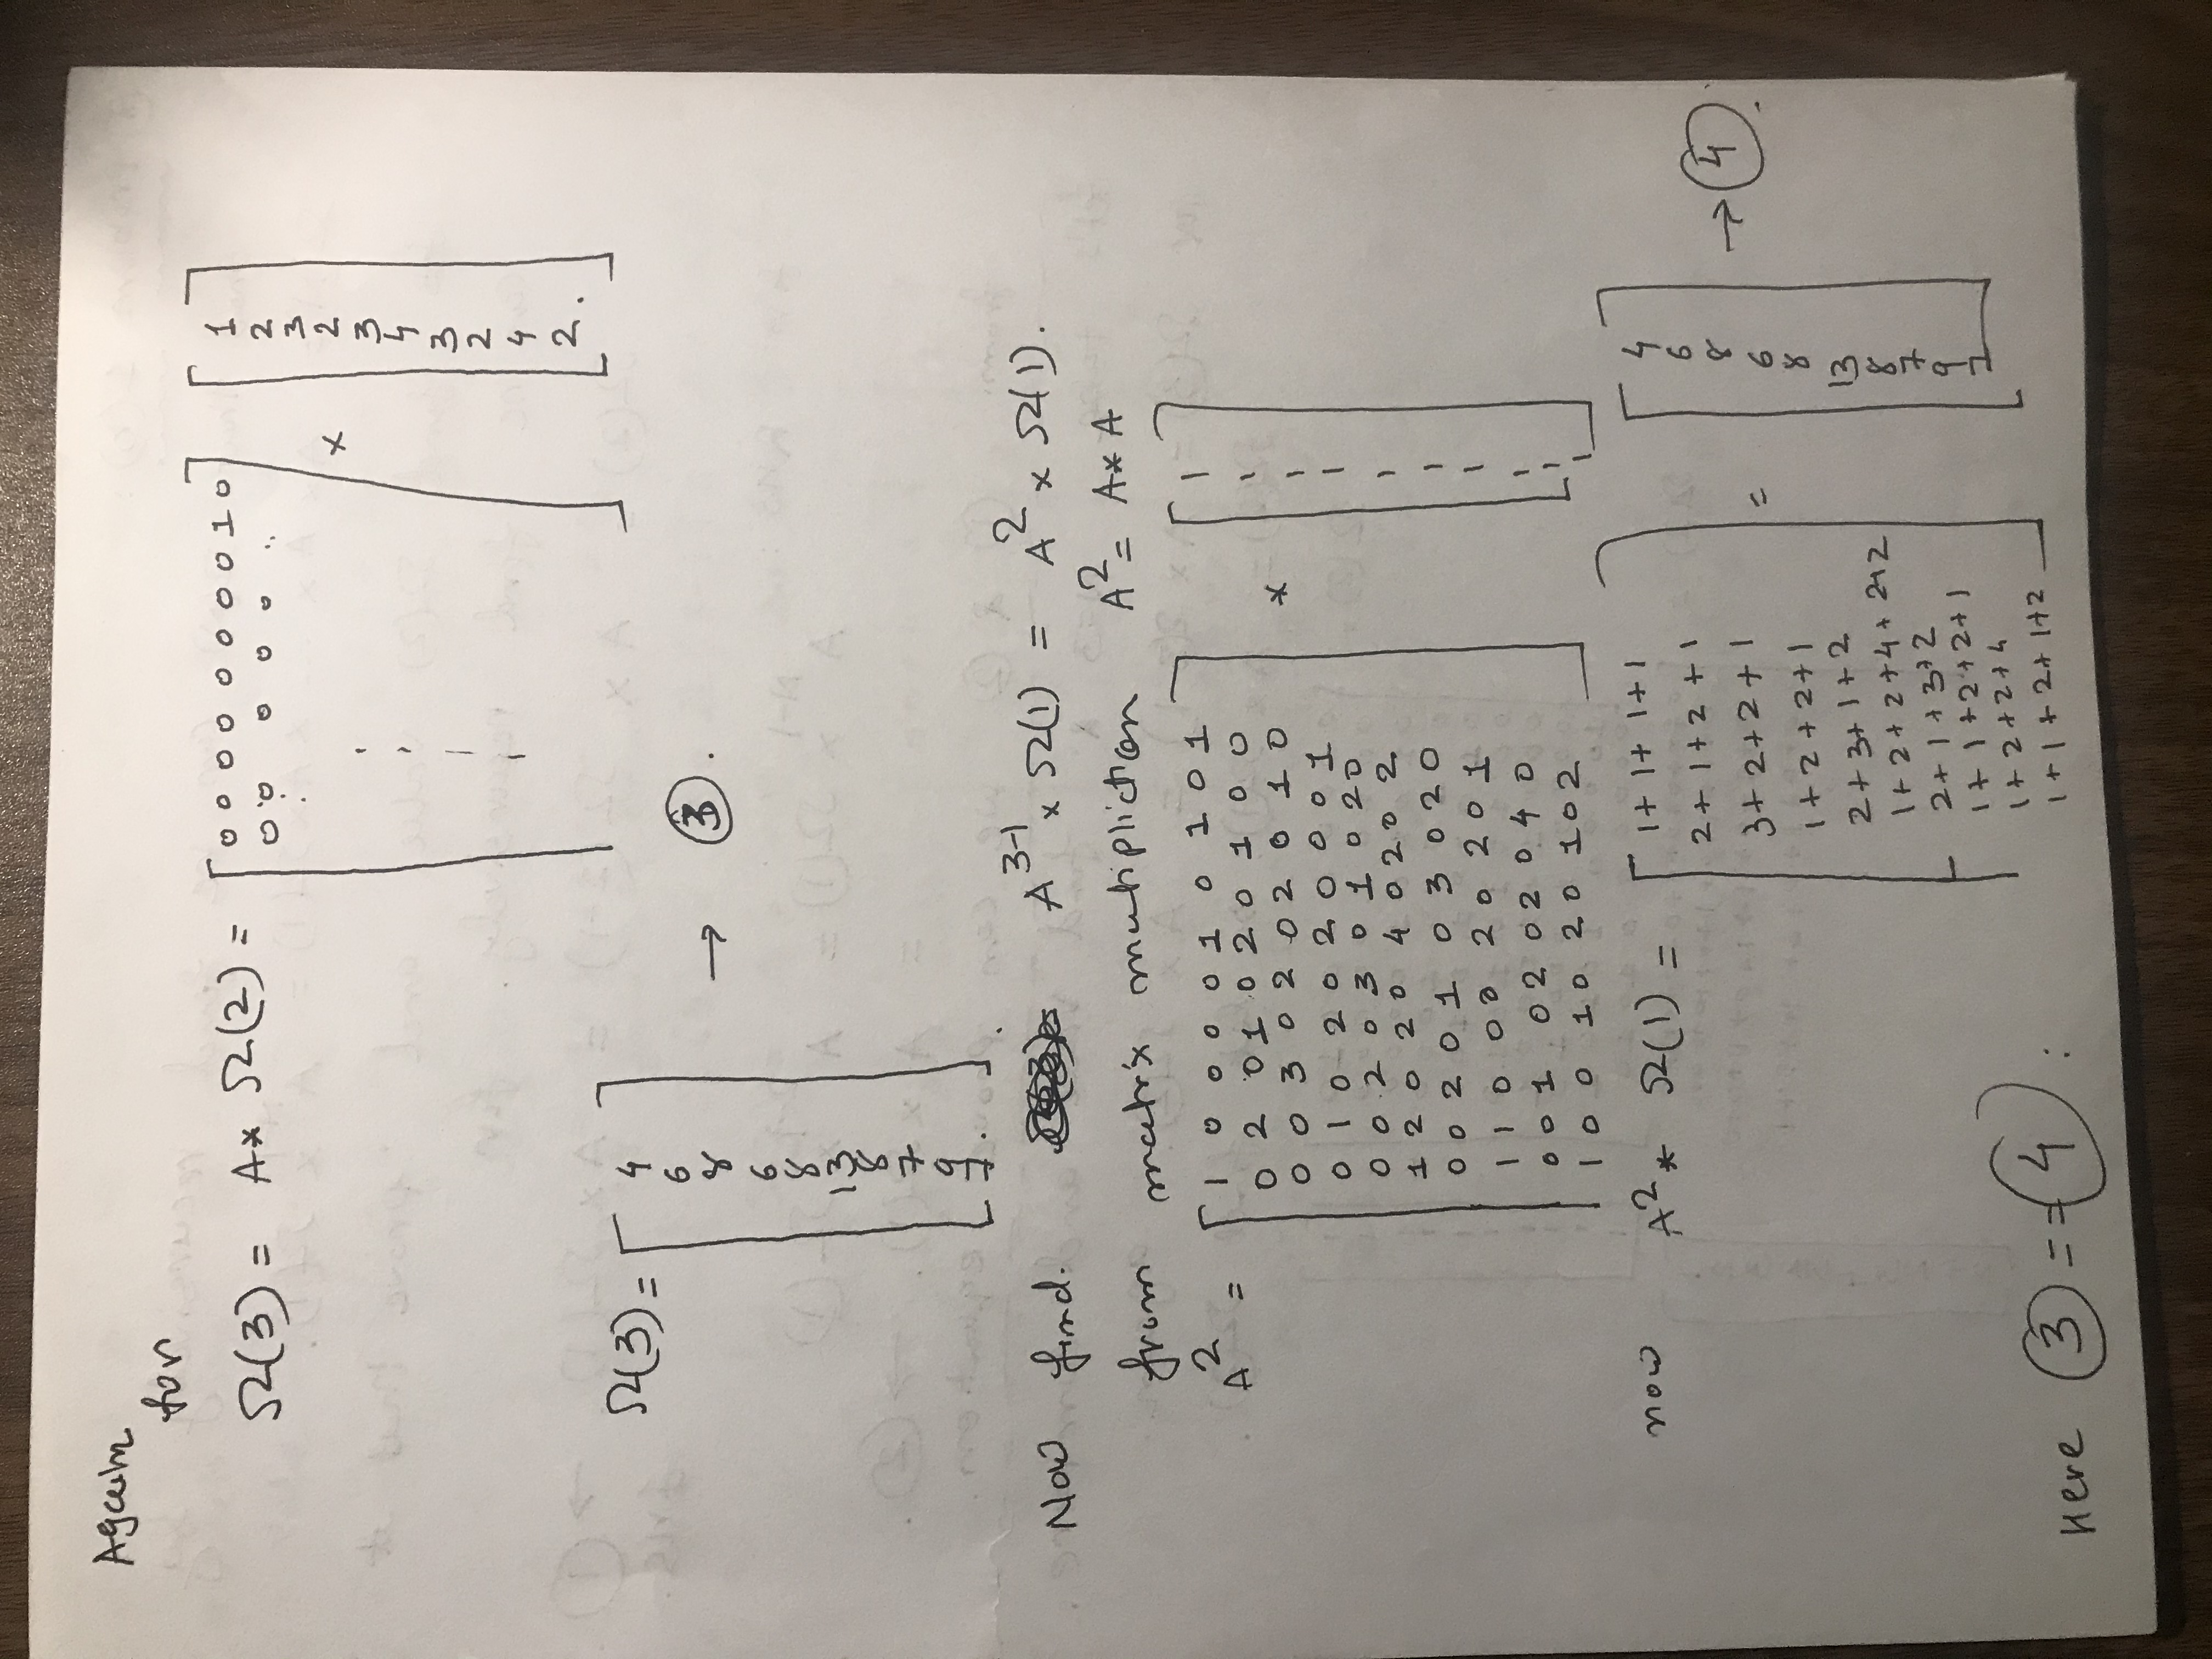

In [14]:
display.Image('b-2.jpg',width=500)

**c) Create a 10 x 10 Numy matrix which contains all the elements we found for  A. find the transpose of the matrix using numpy.transpose. Are the matrix and its transpose equal? Did you expect this result?**

In [65]:
# Import numpy pakage
import numpy as np

# Define numpy matrix a contains all elements
a = np.array([
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 0]

    ])

# find transpose 
aT = np.transpose(a)

# Check transpose is the same as original matrix A
if a.all() == aT.all():
  print("A and transpose(A) are the same")
else:
  print("matrix and its transpose is not the same")

# Alternet method
assert a.all() == aT.all(),"Both matrices are not the same"

A and transpose(A) are the same


Did you expect the result?

Answer: Yes, I expect this resut. since the dialing directions from number 0-9 is the same. its connection matrix and transpose shoule be the same. Example, if you can dial 5 from number 2 then you can also dial number 2 from 5. however, both directions will be different ( down,up ) but you can connect both numbers. so I am expecting A(5,2) == A(2,5) if Asj = 1. 

**d)  Define a function with the name of "Dialer_Problem" which takes two parameters S and N and returns Ω(S,N). Within the function use a "for loop" to multiply Ω(1) to A and then A and so on. Test your function for a few examples. For instance, running Dialer_Probem(5,10) should return 18713.**

In [66]:
# Define 10x1  Omega(1) numpy array for compute.
a1 =  np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Start function defination from here
def dialer_problem(s,n):
  try:
    if n == 0:
      raise ValueError("0 dialing length is not possible.")
    if n == 1:
      return a1[s]
    else:
      # intialize result with matrix.
      result = a1
      for i in range(n-1):
        result = result.dot(a)
    # return sth value of final multiplication.
    return result[s]
  except IndexError:
    print("Please check value of s and n. May be invalid dial or Number > 10")

In [101]:
# Test above function for a few examples
assert dialer_problem(5,10) == 18713
# Test 2
assert dialer_problem(2,2) == 3
# Test 3
assert dialer_problem(0,2) == 1
# Test 4
assert dialer_problem(2,1) == 1
# Test 5
assert dialer_problem(9,1) == 1
# Test 6
assert dialer_problem(5,2) == 4
# Test 7
assert dialer_problem(3,2) == 2

**e) Rewrite the same code without using NumPy package. You will need to create nested list which includes all the elements in A also define a function which performs matrix multiplication.**

In [112]:
# Define pure matrix multiplication function
def mat_mul(p,q):
  p_row = len(p)
  p_col = len(p[0])
  q_row = len(q)
  q_col = len(q[0])

  # check matrix multipliction condition.
  if(p_col != q_row):
    print("Matrix multiplication is not possible")
    raise ValueError("Provide proper dimention matrices.")
  else:
    r =  np.zeros((p_row,q_col))
    for i in range(0, p_row):
      for j in range(0, q_col):
        for k in range(0, p_col):
          r[i][j] = r[i][j] + p[i][k] * q[k][j]
  return r


# create nested arrays for A and A1 
a_array = [
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 0]

    ]
a1_array = [[1],[1],[1],[1],[1],[1],[1],[1],[1],[1]]

# rewrite the same function without numpy
def dialer_problem_without_numpy(s,n):
    if n == 0:
      raise ValueError("0 dialing length is not possible.")
    if n == 1:
      return a1_array[n][0]
    else:
      # intialize result with matrix.
      result = a1_array
      for i in range(n-1):
        result = mat_mul(a_array,result)
    # return sth value of final multiplication.
    return int(result[s])

In [113]:
# Test of above function
assert dialer_problem_without_numpy(5,10) == 18713
# Test 2
assert dialer_problem_without_numpy(2,2) == 3
# Test 3
assert dialer_problem_without_numpy(0,2) == 1
# Test 4
assert dialer_problem_without_numpy(2,1) == 1
# Test 5
assert dialer_problem_without_numpy(9,1) == 1
# Test 6
assert dialer_problem_without_numpy(5,2) == 4
# Test 7
assert dialer_problem_without_numpy(3,2) == 2

**f) Using time module of Python, evalute the algorithm effecienty of your code in part d. You need to make similar figure shown above on your computer.**

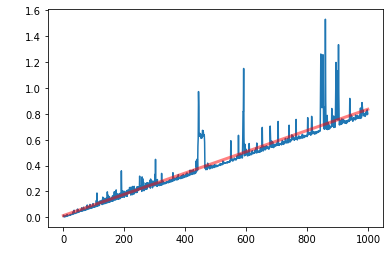

In [75]:
# import necessary packages
import time
import matplotlib.pyplot as plt

# data containers
taken_time = []
samples = []

# set number of sample here, you can change to 2000, 5000 etc.
m = 1000

for i in range(1,m):
  samples.append(i)
  start_time = time.time()
  # selected s = 5 since it has highest recursion.
  dialer_problem(5,i)
  end_time = time.time()
  taken_time.append((end_time-start_time)*1000)

# Define plot params 
font = {'family':'serif','color':'white', 'size':15}
plt.plot(samples, taken_time)
plt.xlabel("Recursion Length N",fontdict=font)
plt.ylabel("Execcution Time(ms)",fontdict=font)

# to get fitted line
f_t = np.poly1d(np.polyfit(samples, taken_time, 1))
plt.plot(samples,f_t(samples),linewidth=3, c='red', alpha=0.5)

# show plot
plt.show()

above, plot indicates that as N (length of dialed) number increase, execution time of function increases linearly(red line). hence we can say that, our implemented algorithm has O(N) time effciency.

**g) How long will running your code for N=10^7 take? Use extraploation to estimate running time. Do you think we need to improve performance of our code to executr it for large numbers?**

In [76]:
# We can predict the time taken for 10^7
N = 10000000
time_for_10_7 = f_t(N)
print("Estimated time for N={} is t={} ms".format(N,time_for_10_7))

Estimated time for N=10000000 is t=8234.186247455293 ms


In [ ]:
# Alternet method to predict 10^7


In [77]:
# Cross checking 
t1 = time.time()
print(dialer_problem(5,10000000))
t2 = time.time()
print("Actual time taken is :{} ms".format((t2-t1)*1000))

7182259121361508581
Actual time taken is :8236.63353919983 ms


Performance for 10^7 is not that bad. however ~8 seconds for computing a single number is a significant amount, for calculating 1000 10^7 numbers will take ~8000 seconds or ~2 hours!! Yes i do think we need to improve the performance.

**h) Write your own function which takes a decimal number and return the number in the binary system. Do not use bin() syntax of python.**

In [78]:
# writing function for binary
def to_bin(n):
  # special case
  if n == 0:
    return '0'
  binary_num = []
  # check and divide number by 2 until number is reduce to zero. add reminder.
  while n != 0:
    reminder = n % 2
    binary_num.append(str(reminder))
    n = n // 2
  # return reverse binary str. so we can start from computing A^2,A^4,A^8 so on.
  return "".join(binary_num)

In [87]:
# some test 
print(to_bin(1000)[::-1]=="1111101000")

True


In [88]:
print(to_bin(0)=="0")

True


In [89]:
print(to_bin(7238398098320980382)[::-1] == "110010001110011111101001011100001000001010010001111100110011110")

True


**i) Imaplement the mentioned algorithm to rebuild your function in part d. This algorithm will allow us to speed up the execution time of the program. You will need to use your binary conver function in part h.**

In [82]:
# Start function defination from here
def dialer_problem_with_optimized_version(s,n):
  try:
    if n == 0:
      raise ValueError("0 dialing length is not possible.")
    if n == 1:
      return a1[s]
    else:
      # convert n into binary
      power_num = to_bin(n-1)
      start = a
      result = a1
      # iterate only through binary length
      for i in power_num:
        if int(i) == 1:
          result = start.dot(result)
        else:
          pass
        # start with A^2 and increments with A^4,A^8,A^16 etc.
        start = start.dot(start)
    return result[s]
  except IndexError:
    print("Please check value of s and n. May be invalid dial or Number > 10")

In [83]:
# Test above function for a few examples
assert dialer_problem_with_optimized_version(5,10) == 18713
# Test 2
assert dialer_problem_with_optimized_version(2,2) == 3
# Test 3
assert dialer_problem_with_optimized_version(0,2) == 1
# Test 4
assert dialer_problem_with_optimized_version(2,1) == 1
# Test 5
assert dialer_problem_with_optimized_version(9,1) == 1
# Test 6
assert dialer_problem_with_optimized_version(5,2) == 4
# Test 7
assert dialer_problem_with_optimized_version(3,2) == 2

**j) Evaluate the algorithmic effciency of your code in the part h in the same way you did in part f.**

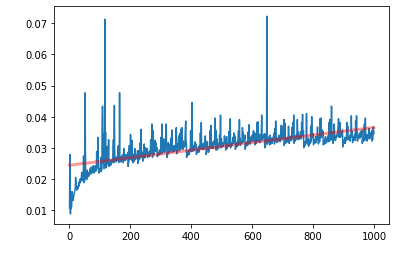

In [84]:
# import necessary packages
import time
import matplotlib.pyplot as plt

# data containers
taken_time = []
samples = []

# set number of sample here, you can change to 2000, 5000 etc.
m = 1000

for i in range(1,m):
  samples.append(i)
  start_time = time.time()
  # selected s = 5 since it has highest recursion.
  dialer_problem_with_optimized_version(5,i)
  end_time = time.time()
  taken_time.append((end_time-start_time)*1000)

# Define plot params 
font = {'family':'serif','color':'white', 'size':15}
plt.plot(samples, taken_time)
plt.xlabel("Recursion Length N",fontdict=font)
plt.ylabel("Execcution Time(ms)",fontdict=font)

# to get fitted line
f_t = np.poly1d(np.polyfit(samples, taken_time, 1))
plt.plot(samples,f_t(samples),linewidth=3, c='red', alpha=0.4)

# show plot
plt.show()

In above graph, It is clear that as recursion length increses linearly, Execution time is **not** increasing linearly. if we observe execution time,It is almost looks constant, However,it is O(log N).

**k) How long will running your code for N=10^7 take using this algorithm? Compare your fining with part g. Algorithm matters!**

In [314]:
#  Finding time for N=10^7 with new optimized algorithm
t1 = time.time()
print(dialer_problem_with_optimized_version(5,10000000))
t2 = time.time()
print("Time taken for optimized algorithm is :{} ms".format((t2-t1)*1000))


7182259121361508581
Time taken for optimized algorithm is :1.2340545654296875 ms


**Final conclusion: With regular linear algorithm, It takes ~ 8000 ms ( or 8 seconds) to compute N=10^7 number for dialing problem.With optimization O(log N) complexity, The same problem can be solve in just ~ 1.23 ms!!!. Agree with the statement Algorithm matters!!!**